Option 2: supervised learning, neural network.  Compare it to Random forest (describe tradeoffs: complexity and accuracy).

I googled keras datasets and decided to use one of its image dataset named cifar100. 

Will install tensorflow and import keras to load the data:

In [95]:
import tensorflow as tf
from tensorflow import keras

In [96]:
import numpy as np
import matplotlib.pyplot as plt

In [97]:
data=keras.datasets.cifar100

Split the data into training and testing sets:

In [98]:
(train_images, train_labels),(test_images, test_labels) = data.load_data()

Explore data:

In [99]:
train_images.shape

(50000, 32, 32, 3)

In [100]:
test_images.shape

(10000, 32, 32, 3)

I have total of 50000 images in my train_images data.
Each image is 32x32.

I have total of 10000 images in my train_images data.

For labels (what we want to predict): we have from 0 to 99 (total of 100 classifications).

In [101]:
print(train_labels.max())

99


In [102]:
print(train_labels.min())

0


I don't even know what these images are, so I will print out some of them:

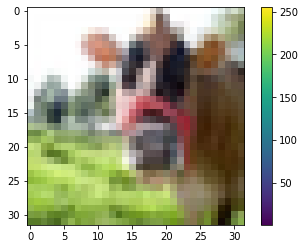

In [103]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

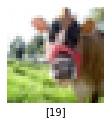

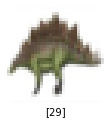

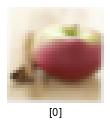

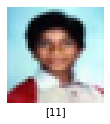

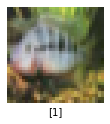

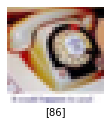

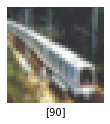

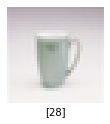

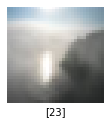

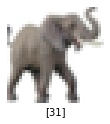

In [104]:
#first 10 images of train_images:
a=np.arange(10)
for i in a:
    plt.figure(figsize=(10,10))
    plt.subplot(2,5,i+1, frameon=False)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
    plt.show()

instead of using the color scale from 0-255, I'm going to scale them to 0 to 1.  
0-1: will give me black and white images instead.

In [105]:
train_images= train_images / 255.0

In [106]:
test_images= test_images / 255.0

Just to make sure they are scaled 0 to 1:

In [107]:
print(train_images[0])

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.76470588 0.80392157 0.75686275]
  [0.83137255 0.87843137 0.8       ]
  [0.71372549 0.76078431 0.65490196]]

 [[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.66666667 0.69019608 0.58823529]
  [0.63137255 0.65882353 0.50980392]
  [0.57254902 0.60392157 0.44313725]]

 [[1.         1.         1.        ]
  [0.99607843 0.99607843 0.99607843]
  [1.         1.         1.        ]
  ...
  [0.74117647 0.78039216 0.6627451 ]
  [0.65098039 0.69803922 0.50980392]
  [0.4745098  0.52156863 0.34117647]]

 ...

 [[0.58039216 0.7254902  0.30980392]
  [0.55686275 0.71372549 0.22352941]
  [0.54901961 0.70196078 0.23529412]
  ...
  [0.11764706 0.06666667 0.00392157]
  [0.25490196 0.24313725 0.05882353]
  [0.29803922 0.30196078 0.07843137]]

 [[0.47843137 0.61568627 0.25882353]
  [0.47058824 0.60784314 0.22745098]


In [108]:
print(train_images[1])

[[[1.         1.         1.        ]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]


Building neural network model:
1. I will first specify how many layers it will have
2. I will assign loss function, metrics, etc.
3. Then train the data.
4. Check the model's loss function and accuracy on train data. 
5. Check the model's performance on test data (accuracy).

https://d4datascience.wordpress.com/2016/09/29/fbf/: how to improve performance of neural network

https://keras.io/optimizers/: choosing optimizers

In [114]:
model= keras.Sequential([
    #first layer: will transform 2D image into 1D data. Enter the train_image.shape info that I got above
    keras.layers.Flatten(input_shape=(32,32,3)),
    #second layer: Number of neurons in this layer. 
    #ReLU also converges faster than other activation function. 
    keras.layers.Dense(1024, activation=tf.nn.relu),
    #third layer: We have total of 100 classes to classify
    keras.layers.Dense(100, activation=tf.nn.softmax)
])

In [124]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#set model's learning method
#optimizer: how the model will be updated based on what it sees and given loss function
#loss function: measure how accurate the model is.  We want this number to be small
#metrics: when set to accuracy, will check the fraction of data that we correctly labeled

In [125]:
model.fit(train_images, train_labels, epochs=5)
#An epoch is a measure of the number of times all of the training vectors 
#are used once to update the weights. For batch training all of the training samples pass through 
#the learning algorithm simultaneously in one epoch before weights are updated.

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 47s 946us/sample - loss: 3.6115 - accuracy: 0.1575
Epoch 2/5
50000/50000 [==============================] - 41s 821us/sample - loss: 3.5528 - accuracy: 0.1631
Epoch 3/5
50000/50000 [==============================] - 40s 799us/sample - loss: 3.5256 - accuracy: 0.1681
Epoch 4/5
50000/50000 [==============================] - 44s 875us/sample - loss: 3.4935 - accuracy: 0.1715
Epoch 5/5
50000/50000 [==============================] - 40s 808us/sample - loss: 3.4779 - accuracy: 0.1735


So... this result is really bad.  

I will try changing the constructor of the model. Perhaps include more layers and also increase epochs

In [133]:
model2= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)), 
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
        keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.softmax)
])

In [134]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [135]:
model2.fit(train_images, train_labels, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 81s 2ms/sample - loss: 4.0280 - accuracy: 0.0779
Epoch 2/10
50000/50000 [==============================] - 75s 2ms/sample - loss: 3.6616 - accuracy: 0.1321
Epoch 3/10
50000/50000 [==============================] - 3820s 76ms/sample - loss: 3.4874 - accuracy: 0.1623
Epoch 4/10
50000/50000 [==============================] - 209s 4ms/sample - loss: 3.3730 - accuracy: 0.1837
Epoch 5/10
50000/50000 [==============================] - 67s 1ms/sample - loss: 3.2769 - accuracy: 0.1999
Epoch 6/10
50000/50000 [==============================] - 1423s 28ms/sample - loss: 3.2039 - accuracy: 0.2112
Epoch 7/10
50000/50000 [==============================] - 89s 2ms/sample - loss: 3.1280 - accuracy: 0.2237
Epoch 8/10
50000/50000 [==============================] - 84s 2ms/sample - loss: 3.0662 - accuracy: 0.2339
Epoch 9/10
50000/50000 [==============================] - 75s 1ms/sample - loss: 3.0056 - accuracy: 0.2438
Epoch 1

In [136]:
trainset_score = model2.evaluate(train_images, train_labels)
testset_score = model2.evaluate(test_images, test_labels)

50000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [137]:
print(trainset_score, testset_score)

[2.7848315953063967, 0.28582] [3.4230974884033203, 0.2054]


model 2 accuracy score on trainset = 28.58%
model 2 accuracy score on testset = 20.54%.

Terrible results still.

Some ways to improve neural network:
1. increase hidden layers
2. change activation function (I will use sigmoid)
3. Change activation function in output layer
4. increase number of neurons (between the size of the input layer and the size of the output layer).

In [138]:
model3= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),     #input layer
    keras.layers.Dense(1000, activation='sigmoid'),
    keras.layers.Dense(1000, activation='sigmoid'),
    keras.layers.Dense(1000, activation='sigmoid'),
    keras.layers.Dense(1000, activation='sigmoid'),
    keras.layers.Dense(100, activation=tf.nn.softmax)   #output layer
])

In [139]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [140]:
model3.fit(train_images, train_labels, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 119s 2ms/sample - loss: 4.6210 - accuracy: 0.0097
Epoch 2/10
50000/50000 [==============================] - 97s 2ms/sample - loss: 4.6098 - accuracy: 0.0093
Epoch 3/10
50000/50000 [==============================] - 94s 2ms/sample - loss: 4.4786 - accuracy: 0.0196
Epoch 4/10
50000/50000 [==============================] - 103s 2ms/sample - loss: 4.3157 - accuracy: 0.0319
Epoch 5/10
50000/50000 [==============================] - 109s 2ms/sample - loss: 4.2614 - accuracy: 0.0358
Epoch 6/10
50000/50000 [==============================] - 94s 2ms/sample - loss: 4.2385 - accuracy: 0.0402
Epoch 7/10
50000/50000 [==============================] - 99s 2ms/sample - loss: 4.2218 - accuracy: 0.0396
Epoch 8/10
50000/50000 [==============================] - 93s 2ms/sample - loss: 4.2152 - accuracy: 0.0410
Epoch 9/10
50000/50000 [==============================] - 93s 2ms/sample - loss: 4.1776 - accuracy: 0.0452
Epoch 10/10

In [141]:
model4= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),     #input layer
    keras.layers.Dense(1000, activation=tf.nn.relu),
    keras.layers.Dense(1000, activation=tf.nn.relu),
    keras.layers.Dense(1000, activation=tf.nn.relu),
    keras.layers.Dense(1000, activation=tf.nn.relu),
    keras.layers.Dense(1000, activation=tf.nn.relu),
    keras.layers.Dense(1000, activation=tf.nn.relu),
    keras.layers.Dense(1000, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.softmax)   #output layer
])

In [142]:
model4.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [143]:
model4.fit(train_images, train_labels, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 156s 3ms/sample - loss: 4.3725 - accuracy: 0.0266
Epoch 2/10
50000/50000 [==============================] - 130s 3ms/sample - loss: 4.1959 - accuracy: 0.0420
Epoch 3/10
50000/50000 [==============================] - 133s 3ms/sample - loss: 4.1442 - accuracy: 0.0488
Epoch 4/10
50000/50000 [==============================] - 137s 3ms/sample - loss: 4.0984 - accuracy: 0.0543
Epoch 5/10
50000/50000 [==============================] - 148s 3ms/sample - loss: 4.0365 - accuracy: 0.0631
Epoch 6/10
50000/50000 [==============================] - 132s 3ms/sample - loss: 3.9754 - accuracy: 0.0732
Epoch 7/10
50000/50000 [==============================] - 137s 3ms/sample - loss: 3.9490 - accuracy: 0.0758
Epoch 8/10
50000/50000 [==============================] - 122s 2ms/sample - loss: 3.9255 - accuracy: 0.0810
Epoch 9/10
50000/50000 [==============================] - 553s 11ms/sample - loss: 3.9061 - accuracy: 0.0829
Epoc

In [144]:
model5= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),     #input layer
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.softmax)   #output layer
])

In [145]:
model5.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [146]:
model5.fit(train_images, train_labels, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 1911s 38ms/sample - loss: 4.3945 - accuracy: 0.0244
Epoch 2/10
50000/50000 [==============================] - 141s 3ms/sample - loss: 4.1400 - accuracy: 0.0483
Epoch 3/10
50000/50000 [==============================] - 134s 3ms/sample - loss: 3.9520 - accuracy: 0.0752
Epoch 4/10
50000/50000 [==============================] - 146s 3ms/sample - loss: 3.8571 - accuracy: 0.0905
Epoch 5/10
50000/50000 [==============================] - 137s 3ms/sample - loss: 3.7877 - accuracy: 0.1026
Epoch 6/10
50000/50000 [==============================] - 157s 3ms/sample - loss: 3.7411 - accuracy: 0.1120
Epoch 7/10
50000/50000 [==============================] - 164s 3ms/sample - loss: 3.6925 - accuracy: 0.1198
Epoch 8/10
50000/50000 [==============================] - 139s 3ms/sample - loss: 3.6449 - accuracy: 0.1283
Epoch 9/10
50000/50000 [==============================] - 149s 3ms/sample - loss: 3.6180 - accuracy: 0.1327
Epo

In [153]:
model6= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)), 
    keras.layers.Dense(138, activation=tf.nn.relu),
    keras.layers.Dense(138, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.softmax)
])

In [154]:
model6.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [155]:
model6.fit(train_images, train_labels, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 19s 376us/sample - loss: 4.0976 - accuracy: 0.0665
Epoch 2/10
50000/50000 [==============================] - 10s 210us/sample - loss: 3.8239 - accuracy: 0.1063
Epoch 3/10
50000/50000 [==============================] - 8s 152us/sample - loss: 3.7065 - accuracy: 0.1252
Epoch 4/10
50000/50000 [==============================] - 8s 153us/sample - loss: 3.6266 - accuracy: 0.1403
Epoch 5/10
50000/50000 [==============================] - 9s 173us/sample - loss: 3.5439 - accuracy: 0.1557
Epoch 6/10
50000/50000 [==============================] - 8s 153us/sample - loss: 3.4881 - accuracy: 0.1638
Epoch 7/10
50000/50000 [==============================] - 7s 148us/sample - loss: 3.4485 - accuracy: 0.1733
Epoch 8/10
50000/50000 [==============================] - 7s 147us/sample - loss: 3.4104 - accuracy: 0.1792
Epoch 9/10
50000/50000 [==============================] - 7s 149us/sample - loss: 3.3834 - accuracy: 0.1831
Epo

In [150]:
model6.fit(train_images, train_labels, epochs=20)

Train on 50000 samples
Epoch 1/20
50000/50000 [==============================] - 12s 248us/sample - loss: 3.3654 - accuracy: 0.1842
Epoch 2/20
50000/50000 [==============================] - 8s 160us/sample - loss: 3.3494 - accuracy: 0.1870
Epoch 3/20
50000/50000 [==============================] - 8s 154us/sample - loss: 3.3351 - accuracy: 0.1891
Epoch 4/20
50000/50000 [==============================] - 11s 227us/sample - loss: 3.3218 - accuracy: 0.1918
Epoch 5/20
50000/50000 [==============================] - 9s 180us/sample - loss: 3.3083 - accuracy: 0.1937
Epoch 6/20
50000/50000 [==============================] - 10s 191us/sample - loss: 3.2956 - accuracy: 0.1966
Epoch 7/20
50000/50000 [==============================] - 8s 167us/sample - loss: 3.2862 - accuracy: 0.1968
Epoch 8/20
50000/50000 [==============================] - 8s 170us/sample - loss: 3.2746 - accuracy: 0.1988
Epoch 9/20
50000/50000 [==============================] - 10s 204us/sample - loss: 3.2680 - accuracy: 0.1985
E

In [151]:
model6.fit(train_images, train_labels, epochs=30)

Train on 50000 samples
Epoch 1/30
50000/50000 [==============================] - 15s 309us/sample - loss: 3.1918 - accuracy: 0.2127
Epoch 2/30
50000/50000 [==============================] - 9s 177us/sample - loss: 3.1925 - accuracy: 0.2134
Epoch 3/30
50000/50000 [==============================] - 9s 174us/sample - loss: 3.1872 - accuracy: 0.2134
Epoch 4/30
50000/50000 [==============================] - 7s 141us/sample - loss: 3.1822 - accuracy: 0.2150
Epoch 5/30
50000/50000 [==============================] - 7s 141us/sample - loss: 3.1786 - accuracy: 0.2123
Epoch 6/30
50000/50000 [==============================] - 9s 170us/sample - loss: 3.1754 - accuracy: 0.2143
Epoch 7/30
50000/50000 [==============================] - 10s 196us/sample - loss: 3.1769 - accuracy: 0.2141
Epoch 8/30
50000/50000 [==============================] - 9s 183us/sample - loss: 3.1709 - accuracy: 0.2156
Epoch 9/30
50000/50000 [==============================] - 7s 137us/sample - loss: 3.1623 - accuracy: 0.2189
Epo

In [152]:
#increasing epochs above 10 doesn't change the accuracy much.  So I will keep epochs = 10

In [158]:
model6_train_score=model6.evaluate(train_images, train_labels)

50000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [159]:
model6_test_score=model6.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [160]:
print(model6_train_score, model6_test_score)

[3.291131876525879, 0.1984] [3.467171357345581, 0.1844]


In [161]:
model7= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)), 
    keras.layers.Dense(138, activation=tf.nn.relu),
    keras.layers.Dense(138, activation=tf.nn.relu),
        keras.layers.Dense(138, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.softmax)
])

In [162]:
model7.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [165]:
model7.fit(train_images, train_labels, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 215us/sample - loss: 2.9906 - accuracy: 0.2492
Epoch 2/10
50000/50000 [==============================] - 7s 147us/sample - loss: 2.9802 - accuracy: 0.2507
Epoch 3/10
50000/50000 [==============================] - 8s 151us/sample - loss: 2.9649 - accuracy: 0.2526
Epoch 4/10
50000/50000 [==============================] - 9s 182us/sample - loss: 2.9588 - accuracy: 0.2553
Epoch 5/10
50000/50000 [==============================] - 8s 156us/sample - loss: 2.9506 - accuracy: 0.2551
Epoch 6/10
50000/50000 [==============================] - 7s 148us/sample - loss: 2.9377 - accuracy: 0.2577
Epoch 7/10
50000/50000 [==============================] - 8s 165us/sample - loss: 2.9284 - accuracy: 0.2588
Epoch 8/10
50000/50000 [==============================] - 7s 147us/sample - loss: 2.9285 - accuracy: 0.2585
Epoch 9/10
50000/50000 [==============================] - 8s 165us/sample - loss: 2.9178 - accuracy: 0.2594
Epoc

In [166]:
model7_score=model7.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [167]:
print(model7_score)

[3.547577840423584, 0.204]


In [221]:
model8= keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)), 
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(256, activation=tf.nn.relu),
        keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.softmax)
])

In [222]:
model8.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [223]:
model8.fit(train_images, train_labels, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 303us/sample - loss: 4.0929 - accuracy: 0.0678
Epoch 2/10
50000/50000 [==============================] - 9s 179us/sample - loss: 3.7010 - accuracy: 0.1305
Epoch 3/10
50000/50000 [==============================] - 9s 187us/sample - loss: 3.5437 - accuracy: 0.1555
Epoch 4/10
50000/50000 [==============================] - 9s 176us/sample - loss: 3.4416 - accuracy: 0.1714
Epoch 5/10
50000/50000 [==============================] - 9s 187us/sample - loss: 3.3677 - accuracy: 0.1857
Epoch 6/10
50000/50000 [==============================] - 9s 173us/sample - loss: 3.3136 - accuracy: 0.1948
Epoch 7/10
50000/50000 [==============================] - 9s 173us/sample - loss: 3.2558 - accuracy: 0.2034
Epoch 8/10
50000/50000 [==============================] - 9s 172us/sample - loss: 3.2043 - accuracy: 0.2101
Epoch 9/10
50000/50000 [==============================] - 9s 170us/sample - loss: 3.1668 - accuracy: 0.2164
Epoc

In [224]:
model8_score=model8.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [225]:
print(model8_score)

[3.482119264984131, 0.1884]


model7 accuracy on test dataset= 20.4%.  Compare that to Random forest

In [173]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
print(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [186]:
train_images_rf=tf.reshape(train_images, [50000, 3072])

In [187]:
clf.fit(train_images_rf, train_labels)

/Users/laurakim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [189]:
test_images_rf=tf.reshape(test_images, [10000, 3072])

In [192]:
from sklearn.metrics import accuracy_score
label_preds = clf.predict(test_images_rf)
print("Accuracy:", accuracy_score(test_labels,label_preds))

Accuracy: 0.1228


In [195]:
print(label_preds[:5])

[ 8 11 19  8 28]


In [196]:
print(test_labels[:5])

[[49]
 [33]
 [72]
 [51]
 [71]]


In [207]:
clf2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [209]:
clf2.fit(train_images_rf, train_labels)

/Users/laurakim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [210]:
test_pred_clf2=clf2.predict(test_images_rf)

In [211]:
print("Accuracy:", accuracy_score(test_labels,test_pred_clf2))

Accuracy: 0.0353


In [212]:
clf3 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [213]:
clf3.fit(train_images_rf, train_labels)

/Users/laurakim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [214]:
test_pred_clf3=clf3.predict(test_images_rf)

In [215]:
print("Accuracy:", accuracy_score(test_labels,test_pred_clf3))

Accuracy: 0.1527


In [217]:
clf4 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [218]:
clf4.fit(train_images_rf, train_labels)

/Users/laurakim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [219]:
test_pred_clf4=clf4.predict(test_images_rf)

In [220]:
print("Accuracy:", accuracy_score(test_labels,test_pred_clf4))

Accuracy: 0.1922


On test dataset, neural network model (model7) had accuracy of 20.4% and random forest model (clf4) had accuracy of 19.22%.
They both performed poorly and gave similar accuracy scores.
When it comes to complexity, neural network model was more complex with having to choose different number of layers, activation function for each layer, and number of neurons, because sometimes increasing their numbers resulted in worsening of model performance.  So trying to find the stopping point was more complex.  